# Implement Poisson Progression using TensorFlow in Python

Inputs: Data

Outputs: A model and b_hat

The environment should have these packaages: `tensorflow`, `keras`, `pandas`, `sklearn`, `numpy`, `matplotlib `.

## Setup

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [2]:
import keras
print("Keras version:", keras.__version__)

Keras version: 2.10.0


## Prepare data

In [10]:
import numpy as np

np.random.seed(898)
nn = 100000
K = 100

# X = np.c_[np.ones(nn), np.random.uniform(size=(nn, K-1))]
X = np.random.uniform(size=(nn, K))
b0 = np.ones(K) / K
y = np.random.poisson(np.exp(X @ b0))


In [8]:
np.shape(X), np.shape(y)

((100000, 100), (100000,))

Divide up the dataset into training and validation data. `test_size` selects a portion of data to be test data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
import numpy as np
X=np.array(X,dtype="float32")
y=np.array(y,dtype="float32")

## Build the model

The code sets up a neural network model with a single dense layer using the exponential activation function. 

- `Sequential` is a Keras class that allows us to create models layer by layer.
- `1` means the output has one dimension.
- `input_dim=X_train.shape[1]`: This specifies the dimensionality of the input data. It's set to the number of features in the input data X_train.
- `activation='exponential'`: This specifies the activation function for the layer. In this case, it's set to 'exponential', which means the output of the layer will be the exponential of the weighted sum of inputs.
`output = activation(dot(input, kernel) + bias) = exp(dot(input, kernel) + bias)`


Find more information in 
[Dense layer](https://keras.io/2.15/api/layers/core_layers/dense/).

In [15]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential() 
model.add(Dense(1, input_dim=X_train.shape[1], activation='exponential'))  # exponential activation function

Show infomation about the model.

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Train the model

### compile

This code configures the neural network model for training using the Adam optimizer, the Poisson loss function, and the Poisson metric for evaluation.

- `optimizer=Adam()`: This parameter specifies the optimizer to be used during training. In this case, it's set to `Adam()`, whihch is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
-  `loss=keras.losses.Poisson()`: This parameter specifies the loss function to be used during training. The `Poisson()` function here refers to the Poisson loss function. `loss = mean(sum(y_pred - y_true * log(y_pred)))`
- `metrics=[keras.metrics.Poisson()]`: This parameter specifies the evaluation metrics to be used during training. It could be a list of metrics.

In [17]:
from keras.optimizers import Adam  

model.compile(
    optimizer=Adam(),
    loss=keras.losses.Poisson(), 
    metrics=[keras.metrics.Poisson()],
)  


### fit

We call `fit()`, which will train the model by slicing the data into "batches" of size
`batch_size`, and repeatedly iterating over the entire dataset for a given number of
`epochs`.

In [18]:
epochs = 300

print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,    
    validation_split=0.15,
)

Fit model on training data
Epoch 1/300
2125/2125 [==============================] - 6s 2ms/step - loss: 0.8682 - poisson: 0.8682 - val_loss: 0.8296 - val_poisson: 0.8296
Epoch 2/300
2125/2125 [==============================] - 4s 2ms/step - loss: 0.8278 - poisson: 0.8278 - val_loss: 0.8280 - val_poisson: 0.8280
Epoch 3/300
2125/2125 [==============================] - 4s 2ms/step - loss: 0.8267 - poisson: 0.8267 - val_loss: 0.8380 - val_poisson: 0.8380
Epoch 4/300
2125/2125 [==============================] - 5s 2ms/step - loss: 0.8271 - poisson: 0.8271 - val_loss: 0.8261 - val_poisson: 0.8261
Epoch 5/300
2125/2125 [==============================] - 4s 2ms/step - loss: 0.8265 - poisson: 0.8265 - val_loss: 0.8260 - val_poisson: 0.8260
Epoch 6/300
2125/2125 [==============================] - 5s 2ms/step - loss: 0.8270 - poisson: 0.8270 - val_loss: 0.8262 - val_poisson: 0.8262
Epoch 7/300
2125/2125 [==============================] - 5s 2ms/step - loss: 0.8267 - poisson: 0.8267 - val_loss: 0

The returned `history` object holds a record of the loss values and metric values
during training:

In [19]:
print(history.history)

{'loss': [0.8681961894035339, 0.8277866840362549, 0.8266697525978088, 0.8271215558052063, 0.8265001773834229, 0.8269814252853394, 0.8267329335212708, 0.8268933892250061, 0.8270233869552612, 0.8266149163246155, 0.827154815196991, 0.8271946907043457, 0.826579749584198, 0.8268014192581177, 0.8268925547599792, 0.8267494440078735, 0.8270748257637024, 0.826631486415863, 0.8267567753791809, 0.8267937302589417, 0.8268844485282898, 0.8266299366950989, 0.8267364501953125, 0.8270810842514038, 0.8266992568969727, 0.8268337249755859, 0.8268970847129822, 0.8269334435462952, 0.8265900015830994, 0.826556921005249, 0.8270639777183533, 0.8270509243011475, 0.8265610933303833, 0.8267791867256165, 0.826957106590271, 0.8270310759544373, 0.8265109062194824, 0.8269197344779968, 0.8266429305076599, 0.8265719413757324, 0.8265510201454163, 0.8269957304000854, 0.8269032835960388, 0.8269296884536743, 0.8271241784095764, 0.8266963362693787, 0.8276617527008057, 0.826846718788147, 0.826876163482666, 0.827152013778686

In [21]:
weights = model.layers[0].get_weights()


In [22]:
print(weights)

[array([[ 0.01589823],
       [ 0.02660634],
       [-0.00374579],
       [ 0.00974168],
       [ 0.02316013],
       [ 0.00779289],
       [ 0.00986268],
       [ 0.01482649],
       [ 0.00613408],
       [ 0.02921264],
       [ 0.02349446],
       [ 0.01559466],
       [ 0.03024372],
       [ 0.00095859],
       [ 0.00207945],
       [ 0.00498902],
       [ 0.01995845],
       [ 0.00740979],
       [ 0.0105727 ],
       [ 0.01595516],
       [ 0.02921729],
       [ 0.02490989],
       [ 0.00467117],
       [ 0.02409012],
       [ 0.02050732],
       [ 0.01469798],
       [-0.00951539],
       [ 0.02237457],
       [ 0.0294974 ],
       [ 0.01599086],
       [ 0.00967024],
       [ 0.0104715 ],
       [ 0.0286387 ],
       [-0.00083455],
       [ 0.02491707],
       [ 0.02577025],
       [ 0.01350615],
       [-0.00067979],
       [ 0.02710109],
       [-0.00155706],
       [ 0.01449263],
       [ 0.01367791],
       [-0.00544295],
       [ 0.012048  ],
       [ 0.00832329],
       [-

## Evaluate the performance

### Plot Keras training pregress.
loss and Epochs

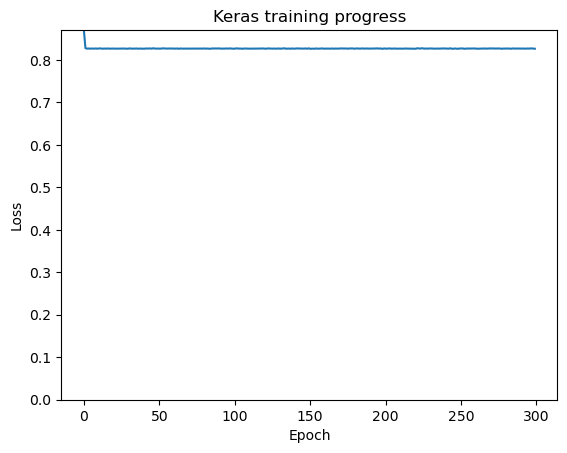

In [23]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss')
plt.title('Keras training progress');

### plot predictions

Evaluate the model on the test data using `evaluate`


In [24]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, verbose=2)
print("test loss, test acc:", results)

Evaluate on test data
625/625 - 1s - loss: 0.8228 - poisson: 0.8228 - 503ms/epoch - 804us/step
test loss, test acc: [0.8228042721748352, 0.8228042721748352]


Predict the model on the test data using `predict`

In [25]:
predictions = model.predict(X_test)

625/625 [==============================] - 1s 908us/step


Plot the predictions and the data.

625/625 [==============================] - 1s 873us/step


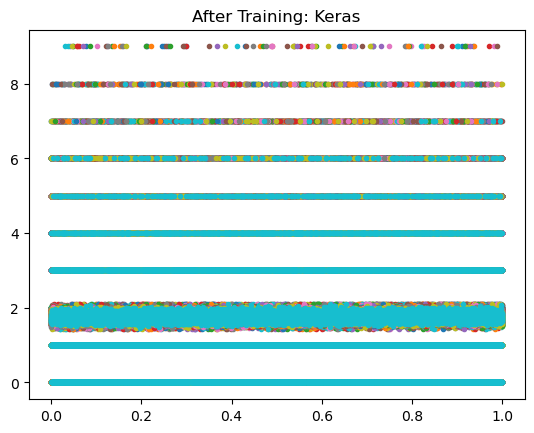

In [27]:
def plot_preds(x, y, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, model.predict(x), '.',label='Predictions')
  plt.title(title)
  # plt.legend()

plot_preds(X_test, y_test, model, 'After Training: Keras')

## Save the model

save the model

In [28]:
model.save("model.keras")

a reload like this:

In [29]:
# load a keras model
model = keras.models.load_model("model.keras")